In [1]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP
from micrograd.jit import jit

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [3]:
np.random.seed(1337)
random.seed(1337)

In [4]:
n_features = 2
hidden_size = 16

In [5]:
model = MLP(n_features, [hidden_size, hidden_size, 1])

In [6]:
def forward(x, y):
    return model([x, y])

In [7]:
jit_forward = jit(forward)

In [23]:
batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 4096]
n_run = 10

In [24]:
py_hist = []
jit_hist = []
for _ in range(n_run):
    tmp_py = []
    tmp_jit = []
    for N in batch_sizes:
        
        X = np.random.normal(size=(N, n_features))
        # micrograd python
        start = time.time()
        list(map(model, X))
        end = time.time()
        tmp_py.append(end-start)
    
        start = time.time()
        list(map(jit_forward, X))
        end = time.time()
        tmp_jit.append(end-start)
    py_hist.append(tmp_py)
    jit_hist.append(tmp_jit)

In [25]:
py_hist = np.array(py_hist)
jit_hist = np.array(jit_hist)

py_mean = py_hist.mean(axis=0)
jit_mean = jit_hist.mean(axis=0)

py_std = py_hist.std(axis=0)
jit_std = jit_hist.std(axis=0)

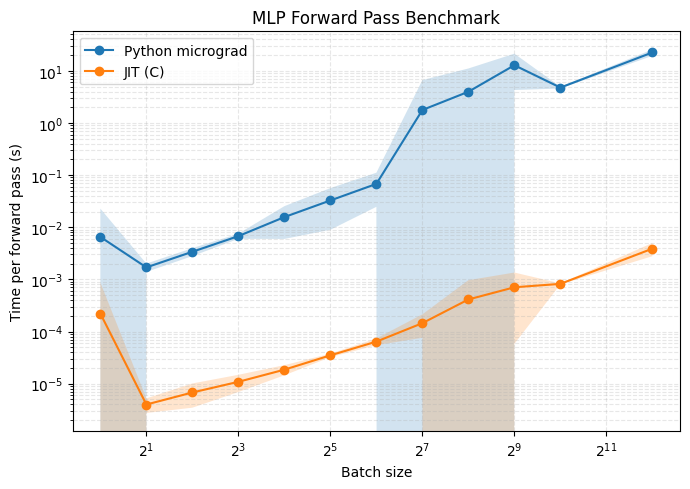

In [26]:
plt.figure(figsize=(7, 5))

plt.plot(batch_sizes, py_mean, marker="o", label="Python micrograd")
plt.plot(batch_sizes, jit_mean, marker="o", label="JIT (C)")

# Optional error bars
plt.fill_between(
    batch_sizes,
    py_mean - py_std,
    py_mean + py_std,
    alpha=0.2
)
plt.fill_between(
    batch_sizes,
    jit_mean - jit_std,
    jit_mean + jit_std,
    alpha=0.2
)

plt.xscale("log", base=2)
plt.yscale("log")

plt.xlabel("Batch size")
plt.ylabel("Time per forward pass (s)")
plt.title("MLP Forward Pass Benchmark")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.3)

plt.tight_layout()
plt.show()


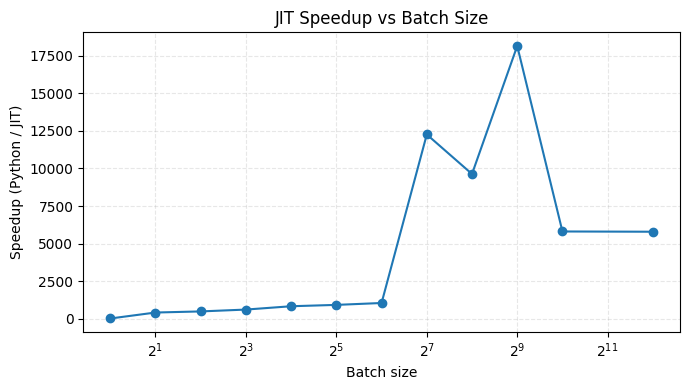

In [27]:
speedup = py_mean / jit_mean

plt.figure(figsize=(7, 4))
plt.plot(batch_sizes, speedup, marker="o")
plt.xscale("log", base=2)
plt.xlabel("Batch size")
plt.ylabel("Speedup (Python / JIT)")
plt.title("JIT Speedup vs Batch Size")
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.tight_layout()
plt.show()
